<a href="https://colab.research.google.com/github/Jomapime/Manejo_de_datos_en_Python/blob/main/Codigos/Visualizacion_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizacion de datos.

Graficos basicos con matplotlib

*   `bar` para graficos de barras verticales.
*   `barh` graficos de barras horizontales.
*   `hist` para histogramas.
*   `box` para boxplot.
*   `kde` o `density` para graficos de densidad.
*   `area` graficos de area.
*   `pie` diagramas de torta.
*   `scatter` diagramas de dispersión.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
x = np.linspace(-2,2,10)
x

y = x**2

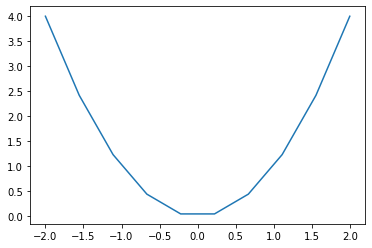

In [ ]:
plt.plot(x,y)

In [ ]:
?plt.plot

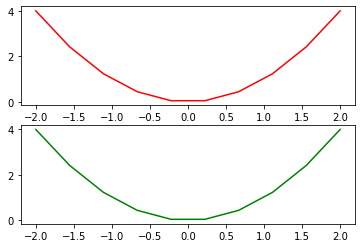

In [ ]:
plt.subplot(211)
plt.plot(x,y, "r")
plt.subplot(212)
plt.plot(x,y, "g")

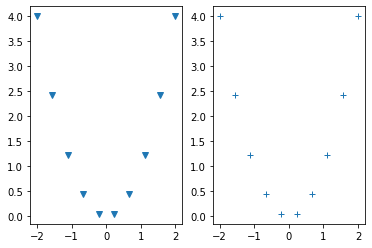

In [ ]:
## FORMATO DE COORDENADA.
plt.subplot(121)
plt.plot(x,y, "v")
plt.subplot(122)
plt.plot(x,y,"+" )


**Ejercicio**: imprima 4 graficos al tiempo, cada uno con un formato de linea diferente

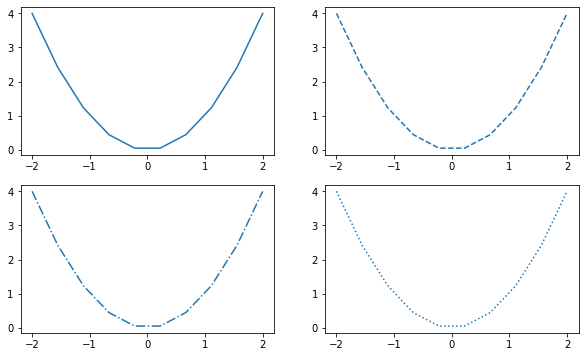

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(221)
plt.plot(x,y, "-")
plt.subplot(222)
plt.plot(x,y, "--")
plt.subplot(223)
plt.plot(x,y, "-.")
plt.subplot(224)
plt.plot(x,y, ":")

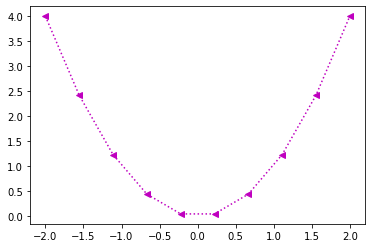

In [ ]:
plt.plot(x,y, "<:m")

## Base de datos

In [ ]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
df = pd.read_csv(url, header = None)
columnas = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = columnas
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
df.replace("?",np.NaN, inplace=True)
df.dropna(axis=0,inplace = True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


## Histogramas

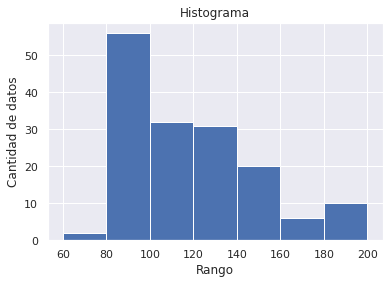

In [ ]:
lista_bins = [60,80,100,120,140,160,180,200]
plt.hist(df["engine-size"], bins = lista_bins)
plt.title("Histograma")
plt.ylabel("Cantidad de datos")
plt.xlabel("Rango")
plt.show()

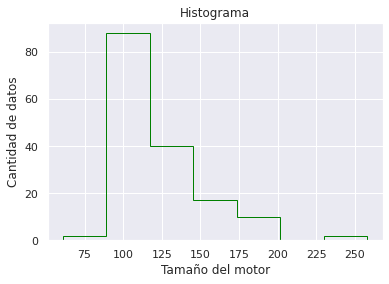

In [ ]:
plt.hist(df["engine-size"], bins = 7, histtype = "step", color = "green")
plt.title("Histograma")
plt.ylabel("Cantidad de datos")
plt.xlabel("Tamaño del motor")
plt.show()

### Seaborn

In [ ]:
import seaborn as sns

In [ ]:
sns.set(style = "darkgrid")

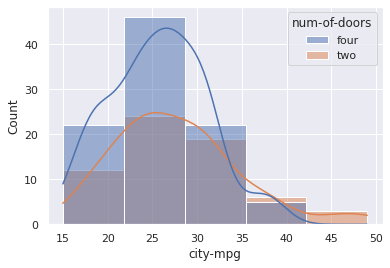

In [ ]:
sns.histplot(data=df, x = "city-mpg", color = "skyblue", bins = 5, label = "city-mpg", hue = "num-of-doors", kde=True )

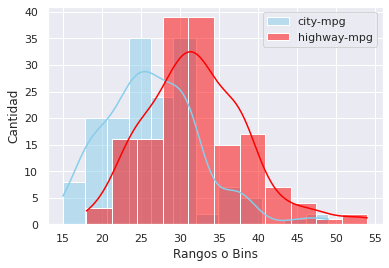

In [ ]:
sns.histplot(data = df, x = "city-mpg", color = "skyblue", label = "city-mpg", kde = True)
sns.histplot(data =df, x = "highway-mpg", color = "red", label = "highway-mpg", kde = True)
plt.xlabel("Rangos o Bins")
plt.ylabel("Cantidad")
plt.legend()

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


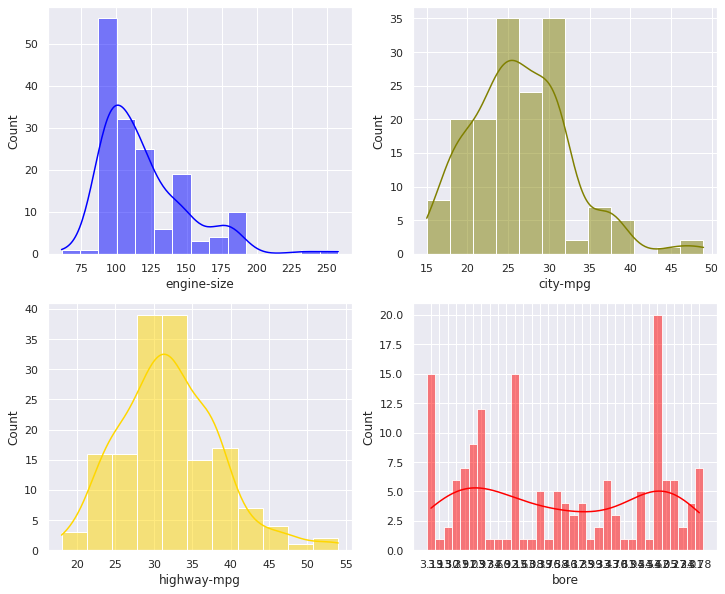

In [ ]:
fig, axs = plt.subplots(2,2, figsize = (12,10))

sns.histplot(data = df, x = "engine-size", kde = True, color = "blue", ax = axs[0,0])
sns.histplot(data = df, x = "city-mpg", kde = True, color = "olive", ax = axs[0,1])
sns.histplot(data = df, x = "highway-mpg", kde = True, color = "gold", ax = axs[1,0])
sns.histplot(data = df, x = "bore", kde = True, color = "red", ax = axs[1,1])

## Boxplolt

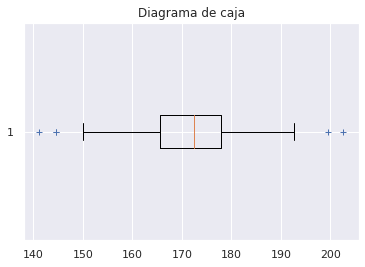

In [ ]:
plt.boxplot(df["length"], vert = False, sym = "b+")
plt.title("Diagrama de caja")
plt.show()

## Seaborn.

Text(0, 0.5, 'Valor')

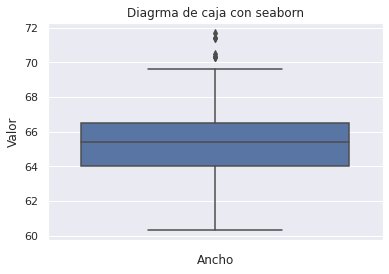

In [ ]:
sns.boxplot(data = df, y = "width")
plt.title("Diagrma de caja con seaborn")
plt.xlabel("Ancho")
plt.ylabel("Valor")

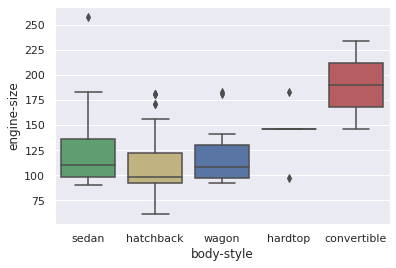

In [ ]:
mi_paleta = {"wagon":"b", "convertible":"r", "sedan":"g", "hatchback":"y", "hardtop":"c"}

sns.boxplot(data=df, x="body-style",y = "engine-size", palette= mi_paleta)

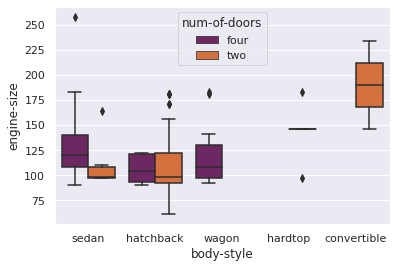

In [ ]:
sns.boxplot(data=df, x="body-style",y = "engine-size", hue = "num-of-doors", palette= "inferno")

## Diagrama de torta

([<matplotlib.patches.Wedge at 0x7feef5a20050>,
 [Text(0.9281531275852168, 0.5903657948710955, 'A'),
  Text(-0.08489295868149192, 1.0967192829372077, 'B'),
  Text(-0.516974487372832, -0.9709466408642639, 'C')])

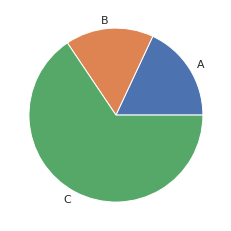

In [ ]:
names = ["A","B","C"]
valores = [11,10,40]
plt.pie(valores,labels = names)

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


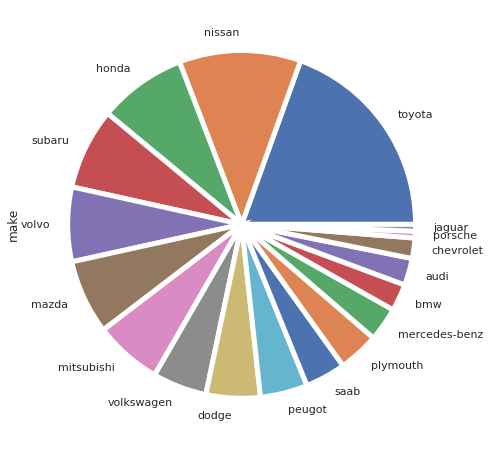

In [ ]:
plt.figure(figsize=(10,8))

df["make"].value_counts().plot(kind = "pie", labeldistance = 1.1,wedgeprops = {"linewidth":5,"edgecolor":"white"})